# Problem to solve

The objective is to use the data from handwritings to create a model that allows to predict if some of those handwritings came from a bipolar person or not.

The data include the target label, which makes it a supervised machine learning task.

## Univariate Analysis

In [35]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import numpy as np
import plotly.express as px
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
og_data = pd.read_csv('../data/raw/Original_Dataset.csv')

In [5]:
og_data.columns

Index(['VHD', 'VLV', 'V(mC)', 'V(E)', 'V(Sx)', 'V(L)', 'Men', 'Femal',
       'Age(0,0.5,1)', 'Label(0,1)'],
      dtype='object')

In [6]:
og_data['VHD'].describe()

count    4.300000e+01
mean     1.531095e-04
std      2.759672e-04
min      1.200000e-07
25%      7.121500e-06
50%      9.962000e-06
75%      9.964300e-05
max      9.850000e-04
Name: VHD, dtype: float64

In [18]:
def show_histogram(data, title):
    n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

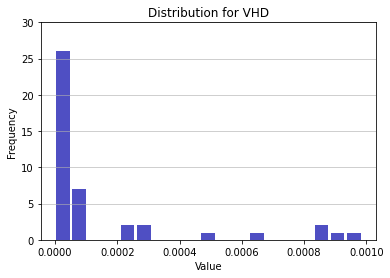

In [19]:
show_histogram(og_data['VHD'], 'Distribution for VHD')

In [28]:
def show_boxplot(data, title):
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(data)
    plt.title(title)
    plt.show()

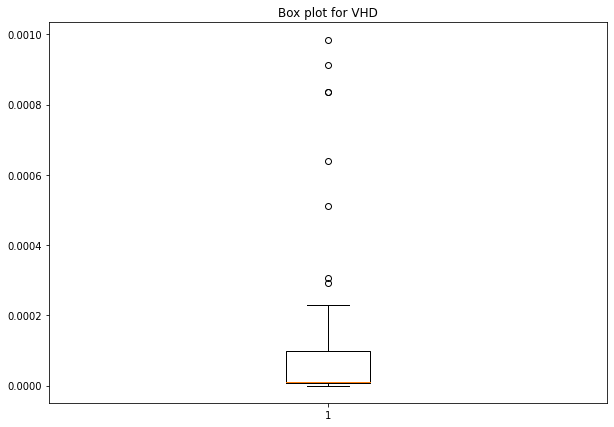

In [31]:
show_boxplot(og_data['VHD'], 'Box plot for VHD')

In [32]:
il = lambda q1, iqr: q1 - 1.5*iqr
sl = lambda q3, iqr: q3 + 1.5*iqr
iqr = lambda q1, q3: q3-q1

In [36]:
def get_stats_from_column(data_frame: pd.DataFrame, column: str, hist:bool = False) -> None:
    description = data_frame[column].describe()
    iqr_value = iqr(description[4], description[6])
    il_value = il(description[4], iqr_value)
    sl_value = sl(description[6], iqr_value)
    var_value = data_frame[column].var()
    std_value = data_frame[column].std()
    skewness_value = skew(data_frame[column])
    kurtosis_value = kurtosis(data_frame[column])
    print(f'Measures of central tendency: \n\n{description}')

    print('+----------------------------------------------------------------------------------------------------------------------------------+')
    print ("|{:<20} | {:<25} | {:<10} | {:<20} | {:<20} | {:<20}|".format('inferior limit', 'superior limit', 'IQR', 'var', 'std', 'Skewness', 'Kurtosis'))
    print('+----------------------------------------------------------------------------------------------------------------------------------+')

    print ("|{:<20} | {:<25} | {:<10} | {:<20} | {:<20} | {:<20}|"
    .format(il_value,sl_value,iqr_value, var_value, std_value, skewness_value, kurtosis_value))
    print('+----------------------------------------------------------------------------------------------------------------------------------+')
    if hist:
        title = "Histogram for {columnName}".format(columnName=column)
        fig = px.histogram(data_frame, x=column, title = title)
        fig.show()
        fig2 = px.box(data_frame, y=column, title="Boxplot for "+column)
        fig2.show()
    else:
        fig = px.box(data_frame, y=column, title="Boxplot for "+column)
        fig.show()


For the Variable Variance of Handwriting we have really small values actually. A mean of 1.53e-4 with a standard deviation of 2.75e-4 in units of variance of handwriting. with a positive Skweness meaning that there is more compacted data to the left of the mean. And the outliers are more into the right side of the mean.

In [37]:
get_stats_from_column(og_data, 'VHD', True)

Measures of central tendency: 

count    4.300000e+01
mean     1.531095e-04
std      2.759672e-04
min      1.200000e-07
25%      7.121500e-06
50%      9.962000e-06
75%      9.964300e-05
max      9.850000e-04
Name: VHD, dtype: float64
+----------------------------------------------------------------------------------------------------------------------------------+
|inferior limit       | superior limit            | IQR        | var                  | std                  | Skewness            |
+----------------------------------------------------------------------------------------------------------------------------------+
|-0.00013166075000000004 | 0.00023842525000000004    | 9.252150000000001e-05 | 7.615791508653718e-08 | 0.00027596723553084554 | 1.9957835720517165  |
+----------------------------------------------------------------------------------------------------------------------------------+


Conclusions: 


In [39]:
get_stats_from_column(og_data, 'VLV', True)

Measures of central tendency: 

count       43.000000
mean     12426.725874
std      14092.135842
min        304.667000
25%       1642.535050
50%       3694.789600
75%      20995.305550
max      55378.008000
Name: VLV, dtype: float64
+----------------------------------------------------------------------------------------------------------------------------------+
|inferior limit       | superior limit            | IQR        | var                  | std                  | Skewness            |
+----------------------------------------------------------------------------------------------------------------------------------+
|-27386.620700000007  | 50024.46130000001         | 19352.770500000002 | 198588292.5797256    | 14092.135841657417   | 1.1636763318984522  |
+----------------------------------------------------------------------------------------------------------------------------------+


Conclusions:

In [41]:
get_stats_from_column(og_data, 'V(mC)', True)

Measures of central tendency: 

count    43.000000
mean      2.660821
std       3.470489
min       0.074410
25%       0.533148
50%       1.374400
75%       3.388984
max      14.237500
Name: V(mC), dtype: float64
+----------------------------------------------------------------------------------------------------------------------------------+
|inferior limit       | superior limit            | IQR        | var                  | std                  | Skewness            |
+----------------------------------------------------------------------------------------------------------------------------------+
|-3.7506058366071438  | 7.672737727678572         | 2.855835891071429 | 12.044295585667172   | 3.47048924298393     | 2.1344816615953057  |
+----------------------------------------------------------------------------------------------------------------------------------+


In [42]:
get_stats_from_column(og_data, 'V(E)', True)

Measures of central tendency: 

count    43.000000
mean      0.016654
std       0.025517
min       0.000137
25%       0.000978
50%       0.004660
75%       0.018786
max       0.092044
Name: V(E), dtype: float64
+----------------------------------------------------------------------------------------------------------------------------------+
|inferior limit       | superior limit            | IQR        | var                  | std                  | Skewness            |
+----------------------------------------------------------------------------------------------------------------------------------+
|-0.02573275          | 0.04549725                | 0.0178075  | 0.0006511127329203196 | 0.025516910724465054 | 1.8317070221350362  |
+----------------------------------------------------------------------------------------------------------------------------------+


In [51]:
og_data['V(Sx)'].unique()

array(['8.122097', '0.251', '1.5306', '1.2935', '1.1127', '12.14',
       '6.181', '2.1173', '1.88', '0.63', '10.703', '0.263', '0.432',
       '0.6683', '0.427', '35', '4.74', '1.24', '8.87', '5.94', '39/ 55',
       '37.76', '3.93', '0.117', '4.072', '3.12', '1.85', '26.751',
       '4.884', '6.29799', '34.82', '4.783', '4.013', '7.083', '38.58',
       '33.986', '39.22', '19.296332222222222', '6.643767750000001',
       '28.768', '32.897', '38.9678', '31.978'], dtype=object)

Taking into account this is not a number we can validate its correct value, can be a division or can be an error, or can also be 39.55 we decide to remove that specific column, which is only one value

In [52]:
og_data[og_data["V(Sx)"] == '39/ 55']

,VHD,VLV,V(mC),V(E),V(Sx),V(L),Men,Femal,"Age(0,0.5,1)","Label(0,1)"
20,0.000009,8105.2,1.9313,0.0013,39/ 55,209 /224,0,1,0.5,0


In [53]:
og_data.loc[((og_data['V(Sx)'] == '39/ 55')), ['V(Sx)']] = np.nan
og_data = og_data.dropna()

Now we can use the variable V(Sx) as a float value

In [54]:
og_data['V(Sx)'] = og_data['V(Sx)'].astype('float') 

For the variable Variance of Entropy. There is a mean of 12.222 points around 14.029 points more or less from its mean. The skweness is positive meaning the outliers tend to be to the right side of the mean, then the outliers are higher than 12.222. But also the more compacted data are near to the left side of the mean. 

In [55]:
get_stats_from_column(og_data, 'V(Sx)', True)

Measures of central tendency: 

count    42.000000
mean     12.222843
std      14.029379
min       0.117000
25%       1.610450
50%       5.412000
75%      24.887333
max      39.220000
Name: V(Sx), dtype: float64
+----------------------------------------------------------------------------------------------------------------------------------+
|inferior limit       | superior limit            | IQR        | var                  | std                  | Skewness            |
+----------------------------------------------------------------------------------------------------------------------------------+
|-33.30487458333334   | 59.802657638888896        | 23.276883055555558 | 196.823467117552     | 14.02937871459574    | 0.9577214174999208  |
+----------------------------------------------------------------------------------------------------------------------------------+


Excersice!

Change the type of the variable V(L)

In [57]:
get_stats_from_column(og_data, 'V(L)', True)

IndexError: index 4 is out of bounds for axis 0 with size 4

In [58]:
og_data['V(L)'].describe()

count          42
unique         42
top       245.843
freq            1
Name: V(L), dtype: object

In [59]:
og_data['V(L)'].unique()

array(['245.843', '173.653', '287.208', '407.5', '460.944', '482.88',
       '90.169', '121.23', '19.875', '31.28', '281.28', '31.32', '38.39',
       '42.31', '38.32', '616', '107.86', '172', '312.62', '662.89',
       '855', '610.62', '371.88', '337.74', '37.88', '98.61', '809.78',
       '2077.13', '5237.31', '1816.5', '371.8427', '207.61', '1808.61',
       '2988.5', '6513.67', '6727.31', '3083.1647444444448',
       '276.78145454545455', '1208.87', '1902.98', '4456.654', '1031.78'],
      dtype=object)

In [60]:
og_data['V(L)'] = og_data['V(L)'].astype('float')

Analysis:


In [61]:
get_stats_from_column(og_data, 'V(L)', True)

Measures of central tendency: 

count      42.000000
mean     1129.852259
std      1717.643623
min        19.875000
25%       133.922500
50%       371.861350
75%      1164.597500
max      6727.310000
Name: V(L), dtype: float64
+----------------------------------------------------------------------------------------------------------------------------------+
|inferior limit       | superior limit            | IQR        | var                  | std                  | Skewness            |
+----------------------------------------------------------------------------------------------------------------------------------+
|-1412.0899999999997  | 2710.6099999999997        | 1030.6749999999997 | 2950299.616678217    | 1717.6436233043853   | 2.1019708091167035  |
+----------------------------------------------------------------------------------------------------------------------------------+


In [63]:
def show_pie_chart(data, column, title):
    '''
    This method allows to create a pie chart with a particular design
    Made by: Cristian G. Sánchez Pineda, based on: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
    '''
    sns.set_palette("Set1")
    labels = data[column].astype('category').cat.categories.tolist()
    counts = data[column].value_counts()
    sizes = [counts[value] for value in labels]
    _, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,shadow=False, radius=0.5)  # autopct is show the % on plot
    fig = plt.gcf()
    ax1.axis('equal') 
    my_circle=plt.Circle( (0,0), 0.35, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

    plt.title(title) 
    plt.tight_layout()
    plt.show()

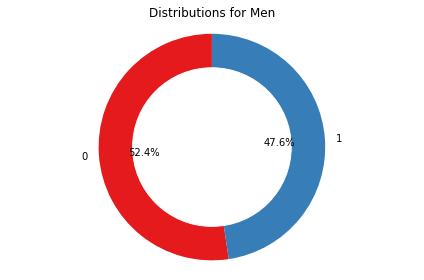

In [64]:
show_pie_chart(og_data, 'Men', 'Distributions for Men')

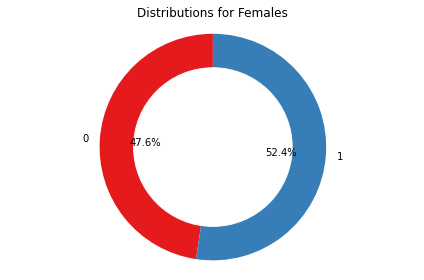

In [66]:
show_pie_chart(og_data, 'Femal', 'Distributions for Females')

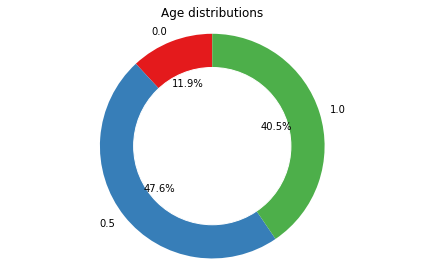

In [67]:
show_pie_chart(og_data, 'Age(0,0.5,1)', 'Age distributions')

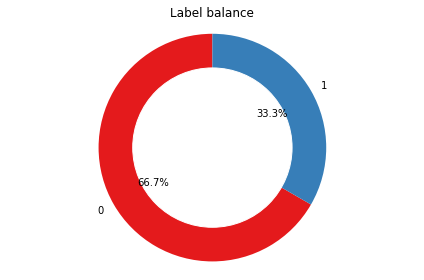

In [68]:
show_pie_chart(og_data, 'Label(0,1)', 'Balance Label')

In [69]:
og_data['Men'] = og_data['Men'].astype('category')
og_data['Femal'] = og_data['Femal'].astype('category')
og_data['Age(0,0.5,1)'] = og_data['Age(0,0.5,1)'].astype('category')
og_data['Label(0,1)'] = og_data['Label(0,1)'].astype('category')


In [71]:
og_data.to_parquet('../data/processed/data_processed.parquet', index=False)